In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import re
from nltk import pos_tag
from nltk.corpus import wordnet
import string
import nltk
from nltk.stem import PorterStemmer
import gensim
from gensim.utils import simple_preprocess
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
import chardet

with open(r"/content/drive/MyDrive/CodeSoft /SMS Spam Detection/spam.csv", 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

df = pd.read_csv(r"/content/drive/MyDrive/CodeSoft /SMS Spam Detection/spam.csv",encoding=encoding)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
del df["Unnamed: 2"]
del df["Unnamed: 3"]
del df["Unnamed: 4"]

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.rename({"v1":"result","v2":"messages"},inplace=True,axis=1)

In [ ]:
df

,result,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#Data Analysing

In [ ]:
df.isna().sum()

result      0
messages    0
dtype: int64

In [ ]:
df["result"].value_counts()

result
ham     4825
spam     747
Name: count, dtype: int64

<Axes: title={'center': 'instances vs classes'}, xlabel='no of instances', ylabel='classes'>

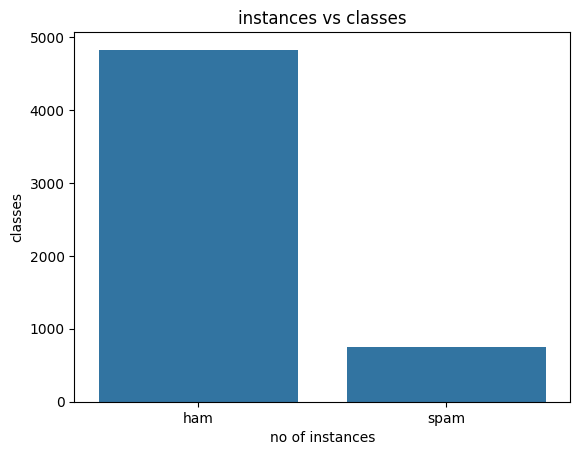

In [ ]:
plt.title("instances vs classes")
plt.xlabel("no of instances")
plt.ylabel("classes")
sbn.barplot(x=["ham","spam"],y=[df["result"].value_counts()["ham"],df["result"].value_counts()["spam"]])

([<matplotlib.patches.Wedge at 0x7f56574a7a30>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.6%'),
  Text(0.5475662602592474, -0.2452981667801496, '13.4%')])

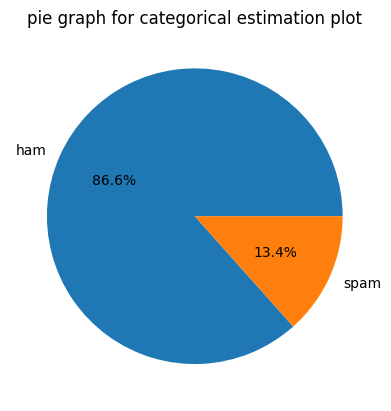

In [ ]:
plt.title("pie graph for categorical estimation plot")
plt.pie(x=[df["result"].value_counts()["ham"],df["result"].value_counts()["spam"]],labels=["ham","spam"],autopct="%1.1f%%")

#Transforming Textual Data

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords') # Download the stopwords corpus

punctuations=string.punctuation
stop=stopwords.words('english')
stop.extend(punctuations)
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stemmer=PorterStemmer()

In [ ]:
punctuations=string.punctuation
stop=stopwords.words('english')
stop.extend(punctuations)
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
corpus=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-z0-9]',' ',df.iloc[i]["messages"])
    review=review.lower()
    review=review.split()
    review=[stemmer.stem(word) for word in review if not word in stop]
    review=' '.join(review)
    corpus.append(review)

#Converting Data

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')

corpus=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-z0-9]',' ',df.iloc[i]["messages"])
    review=review.lower()
    review=review.split()
    review=[stemmer.stem(word) for word in review if not word in stop]
    review=' '.join(review)
    corpus.append(review)

words=[]
j=0
y=[]
for sent in corpus:
    sent_token=sent_tokenize(sent) # This should work now after downloading 'punkt'
    if(sent!=""):
        y.append(df.iloc[j]['result'])
    j=j+1
    for i in sent_token:

        data=word_tokenize(i)
        words.append(data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
len(corpus)

5572

In [ ]:
model=gensim.models.Word2Vec(words,window=5,min_count=2,vector_size=20)

In [ ]:
print(len(model.wv.index_to_key[0:10]))
model.wv.index_to_key[0:10]

10


['u', 'call', '2', 'go', 'get', 'ur', '4', 'gt', 'lt', 'come']

In [ ]:
def avg_word2vec(doc, model):
     word_vectors = [model.wv[word] for word in doc if word in model.wv.index_to_key]
     if not word_vectors:
        return np.zeros(model.vector_size)
     return np.mean(word_vectors, axis=0)

In [ ]:
X=[]
for i in tqdm(range(len(words))):
    X.append(avg_word2vec(words[i],model))

100%|██████████| 5565/5565 [00:01<00:00, 4555.10it/s]


In [ ]:
Y=[]
for i in y:
    if i=='ham':
        Y.append(0)
    else:
        Y.append(1)
print(len(X))
print(len(Y))

5565
5565


#Data Spliting,Training & Testing

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [ ]:
print(len(x_train))
print(len(x_test))

4173
1392


#Model


In [ ]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),]

In [ ]:
best_model=""
best_accuracy=0

In [ ]:
for name,model in models:
    model.fit(x_train,y_train)
    y_test_predicted=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_test_predicted)
    report=classification_report(y_test,y_test_predicted)
    if accuracy > best_accuracy:
        best_model= name
        best_accuracy = accuracy

In [ ]:
print(best_model)
print(best_accuracy)

Random Forest
0.9540229885057471


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1205
           1       0.92      0.76      0.83       187

    accuracy                           0.96      1392
   macro avg       0.94      0.87      0.90      1392
weighted avg       0.96      0.96      0.96      1392



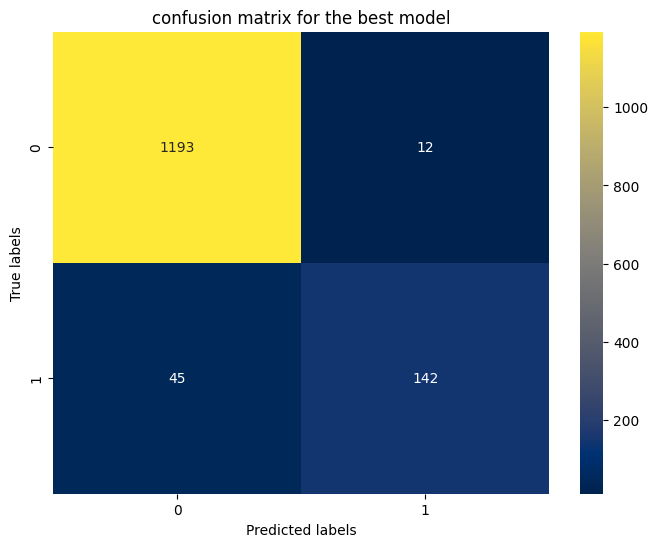

In [ ]:
classifier=ExtraTreesClassifier()
classifier.fit(x_train,y_train)
y_predicted=classifier.predict(x_test)
print(classification_report(y_test,y_predicted))
cm=confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(8, 6))
sbn.heatmap(cm, annot=True, cmap='cividis', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title("confusion matrix for the best model")
plt.show()